# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy
import seaborn as sns
sns.set()

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\rupal\Anaconda3\envs\PythonData_3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


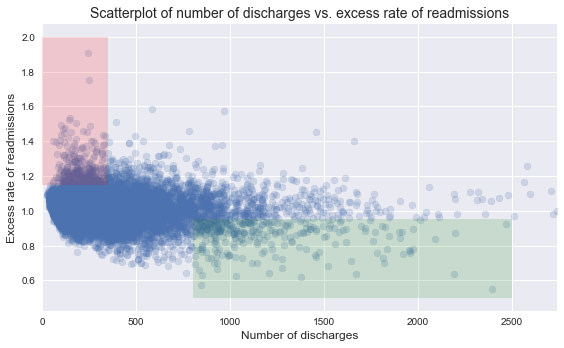

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### A. Do you agree with the above analysis and recommendations? Why or why not?
The graph shows a trend of decreasing rate of readmissions with increasing number of discharges. A regression line on this plot shows a strong negative correlation between the two variables. 
The statistics in the preliminary report are correct.
It is possible that smaller hospitals may be lacking the resources to provide quality care and prevent readmissions, but further analysis is needed to support this.
The preliminary report has analyzed the data for hospitals with capcity less than 100 and greater than 1000. But, the policy is  recommended for hospitals with capacity less than 300. The policy recommendations are not in tune with the analysis and the conclusion. 

In [6]:
# Create two datasets - hospital capacity < 100, and hospital capacity > 1000
df = clean_hospital_read_df[81:-3]
small_hosp_df =  df[df['Number of Discharges'] < 100]
large_hosp_df = df[df['Number of Discharges'] > 1000]

In [7]:
# Calculate the mean 
small_hosp_df_mean = small_hosp_df['Excess Readmission Ratio'].mean()
large_hosp_df_mean = large_hosp_df['Excess Readmission Ratio'].mean()
print('Mean readmission rate for hospitals with capacity less than 100:', round(small_hosp_df_mean,2))
print('Mean readmission rate for hospitals with capacity greater than 1000:', round(large_hosp_df_mean,2))

Mean readmission rate for hospitals with capacity less than 100: 1.02
Mean readmission rate for hospitals with capacity greater than 1000: 0.98


In [8]:
# Calculate the percentage of Excess Readmissions Rate above 1 
small_hosp_above_one = sum(small_hosp_df['Excess Readmission Ratio'] > 1) / len(small_hosp_df) * 100
print('Excess readmission rate greater than 1 for hospitals with capacity < 100: ', round(small_hosp_above_one), '%')
large_hosp_above_one = sum(large_hosp_df['Excess Readmission Ratio'] > 1) / len(large_hosp_df) * 100
print('Excess readmission rate greater than 1 for hospitals with capacity > 1000: ', round(large_hosp_above_one), '%')

Excess readmission rate greater than 1 for hospitals with capacity < 100:  63.0 %
Excess readmission rate greater than 1 for hospitals with capacity > 1000:  45.0 %


In [9]:
# Linear Regression (y = ax + b)
a, b = np.polyfit(x, y, 1)
x_lr = np.array([0, 3000])
y_lr = a * x_lr + b

print('Slope: ', a)

Slope:  -2.8565052943819733e-05


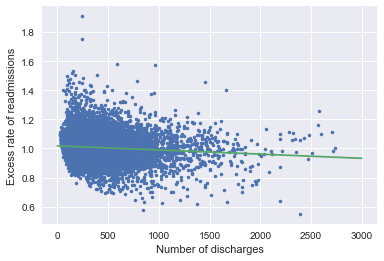

In [10]:
# Plot number of discharges versus rate of readmissions
# Add regression line to the plot 

_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.plot(x_lr, y_lr)
_ = plt.xlabel('Number of discharges')
_ = plt.ylabel('Excess rate of readmissions')
plt.margins = 0.02
plt.show()


There is a strong linear negative correlation between the two variables. 

#### 1. Setup an appropriate hypothesis test.
Null hypothesis: number of discharges and readmissions rate are not correlated:  number of discharges != excess readmissions rate

Alternate hypothesis: number of discharges and readmissions rate are correlated: number of discharges == excess readmissions rate
   
Significance level: alpha = 0.01

#### 2. Compute and report the observed significance value (or p-value).

In [11]:
#Pearson correlation cefficient measures how much variability is due to them being correlated. -1 to +1
def pearson_r(x,y):  
    """Compute Pearson correlation coefficient between two arrays"""
    corr_mat = np.corrcoef(x,y) 
    return(corr_mat[0,1])

In [12]:
# Compute observed correlation
r_obs = pearson_r(x,y)

print('Observed significance (p-value): ', r_obs)

Observed significance (p-value):  -0.0930955428759044


The observed significance value of -0.93 shows a very low negative correlation between hospital size (number of discharges) and readmsssions rate.

#### 3. Report statistical significance for  α = .01

In [13]:
alpha = 0.01

In [14]:
# Initialize perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates 
for i in range(1000):
    discharges_permuted = np.random.permutation(x)

    #Compute Pearson correlation
    perm_replicates[i] = pearson_r(discharges_permuted, y)

# Compute p-value
p_val = np.sum(perm_replicates >= r_obs) / len(perm_replicates)

if p_val < alpha:
    print('p_val of ', p_val, ' is less than alpha so we fail to reject the null hypothesis. The variables are correlated.')
else:
    print('p_val of ', p_val, ' is greater than alpha so we accept the null hypothesis. The variables are not correlated.')

p_val of  1.0  is greater than alpha so we accept the null hypothesis. The variables are not correlated.


In [15]:
if p_val < alpha:
    print('p_val of ', p_val, ' is less than alpha so we fail to reject the null hypothesis. The variables are correlated.')
else:
    print('p_val of ', p_val, ' is greater than alpha so we accept the null hypothesis. The variables are not correlated.')

p_val of  1.0  is greater than alpha so we accept the null hypothesis. The variables are not correlated.


In [16]:
# Permutation Bootstrap

# Difference of means
diff_means = diff_of_means = np.mean(small_hosp_df['Excess Readmission Ratio']) - np.mean(large_hosp_df['Excess Readmission Ratio'])

perm_reps = np.empty(10000)

for i in range(len(perm_reps)):
    data = np.concatenate((small_hosp_df['Excess Readmission Ratio'], large_hosp_df['Excess Readmission Ratio']))
    perm_data = np.random.permutation(data)
    perm_data_s = perm_data[:len(small_hosp_df['Excess Readmission Ratio'])]
    perm_data_l = perm_data[len(large_hosp_df['Excess Readmission Ratio']):]
    perm_reps[i] = np.mean(perm_data_s) - np.mean(perm_data_l)

p_value = np.sum(perm_reps > diff_of_means) / len(perm_reps)

if p_val < alpha:
    print('p_val of ', p_val, ' is less than alpha so we fail to reject the null hypothesis. The variables are correlated.')
else:
    print('p_val of ', p_val, ' is greater than alpha so we accept the null hypothesis. The variables are not correlated.')

p_val of  1.0  is greater than alpha so we accept the null hypothesis. The variables are not correlated.


#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

In [17]:
# Practical Significance

diff_of_means = np.mean(small_hosp_df['Excess Readmission Ratio']) - np.mean(large_hosp_df['Excess Readmission Ratio'])

std = np.std(clean_hospital_read_df['Excess Readmission Ratio'])

effect_size = diff_of_means / std

z_critical = scipy.stats.norm.ppf(0.99)

s = small_hosp_df['Excess Readmission Ratio']
l = large_hosp_df['Excess Readmission Ratio']

sem = np.sqrt((np.var(s)/len(s)) + (np.var(l)/len(l)))
 
moe = sem * z_critical

ci = [diff_of_means - moe, diff_of_means + moe]

ttest, pval = scipy.stats.ttest_ind(small_hosp_df['Excess Readmission Ratio'], large_hosp_df['Excess Readmission Ratio'])


print('p-value: ', pval)
print('Confidence Interval: ', ci)

p-value:  1.5212365437597768e-22
Confidence Interval:  [0.03003446855884449, 0.057056144821334046]


In [18]:
if pval < alpha:
    print('p-value of ', pval, ' is less than alpha, so we reject the null hypothesis. The two variables are correlated.')
else:
    print('p-value of ', pval, ' is greater than alpha, so we accept the null hypothesis. The two variables are not correlated')

p-value of  1.5212365437597768e-22  is less than alpha, so we reject the null hypothesis. The two variables are correlated.


Statistical significance is the likelihood that a relationship between two or more variables is caused by something other than chance. It is built on hypotheis testing, normal distribution, and p values.  If p-vale is less than the significance level (typically 0.05 corresponding to a 5% chance the results occurred at random), then the results are statistically significant.
Statistical significance is directly impacted by sample size.

Practical Significance refers to the magnitude of the difference. It is not influenced by sample size. Results are practically significant when the difference is large enough to be meaningful in real life. It can be determined by measuring the effect size and using Confidence Intervals.

Statistical significance does not necessarily mean that the results are practically significant.

Based on the above hypothesis, the correlaton is not statistically significant, but it is practically significant.

#### 5. Look at the scatterplot above
* What are the advantages and disadvantages of using this plot to convey information?
* Construct another plot that conveys the same information in a more direct manner. 

Advantages - The red and green areas draw attention to the very high excess rate of readmissions, and the low number of discharges with low readmission rates respectively. The plot shows correlation between the two variables and a trend.
 
Disadvantages - It is diffiult to visualize individual datapoints. 

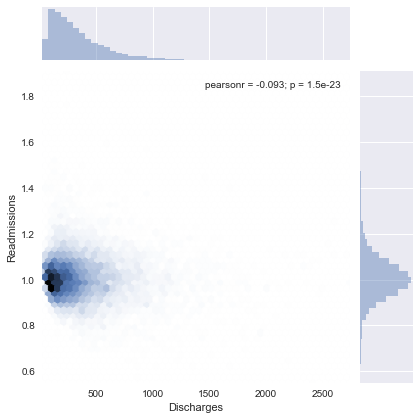

In [19]:
data = pd.DataFrame({'Discharges': x, 'Readmissions': y})
sns.jointplot(x='Discharges', y='Readmissions', data = data, kind = 'hex')
plt.show()